# Mersenne Twister Random Number Generation From Scratch MT19337

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

## Mersenne Twister Algorithm

### Constants and Parameters
- Word size: $w = 32$
- Degree of recurrence: $n = 624$ 
- Middle word: $m = 397$
- Separation point: $r = 31$
- Twist coefficient: $a = \texttt{0x9908B0DF}$
- Initialization multiplier: $f = 1812433253$

### State Initialization
Given seed value:
$$
MT[0] = \text{seed}
$$
For $i = 1$ to $623$:
$$
MT[i] = (f \cdot (MT[i-1] \oplus (MT[i-1] \gg (w-2))) + i) \mod 2^w
$$

### Twist Operation
Masks:
$$
\begin{aligned}
\text{lower\_mask} &= (1 \ll r) - 1 \\
\text{upper\_mask} &= \sim \text{lower\_mask} \,\&\, (2^w - 1)
\end{aligned}
$$

For each $i$ from $0$ to $623$:
$$
\begin{aligned}
x &= (MT[i] \,\&\, \text{upper\_mask}) | (MT[(i+1) \mod n] \,\&\, \text{lower\_mask}) \\
xA &= x \gg 1 \\
\text{if } x \mod 2 &\neq 0: \\
&\quad xA = xA \oplus a \\
MT[i] &= MT[(i + m) \mod n] \oplus xA
\end{aligned}
$$

### Tempering Transform
For output value $y$:
$$
\begin{aligned}
y &= y \oplus ((y \gg 11) \,\&\, \texttt{0xFFFFFFFF}) \\
y &= y \oplus ((y \ll 7) \,\&\, \texttt{0x9D2C5680}) \\
y &= y \oplus ((y \ll 15) \,\&\, \texttt{0xEFC60000}) \\
y &= y \oplus (y \gg 18)
\end{aligned}
$$

### Key Properties
- Period: $2^{19937} - 1$ (Mersenne prime)
- 623-dimensional equidistribution
- Not cryptographically secure

In [2]:
w, n, m, r = 32, 624, 397, 31
a = 0x9908B0DF
f = 1812433253
u, s, t, l = 11, 7, 15, 18
d, b, c = 0xFFFFFFFF, 0x9D2C5680, 0xEFC60000

lower_mask = (1<<r) - 1
upper_mask = (~lower_mask) & 0xFFFFFFFF
MT = [0] * 624
index = 624


def initialise_state_array(seed = 42):
    global MT
    MT[0] = seed
    for i in range(1, 624, 1):
        seed = f * (seed ^ (seed >> (w - 2))) + i
        MT[i] = seed & 0xFFFFFFFF
        

def twist():
    global index
    for i in range(624):
        x = (MT[i] & upper_mask) + (MT[(i+1) % 624] & lower_mask)
        xA = x >> 1
        if (x & 1):
            xA ^= a
        MT[i] = MT[(i+m) % 624] ^ xA
    index = 0

def tampering(y):
    y ^= (y >> u) & d
    y ^= (y << s) & b
    y ^= (y << t) & c
    y ^= (y >> l)
    return y

        
def random():
    global index
    if (index >= 624):
        twist()
    y = MT[index]
    y = tampering(y)
    index += 1
    return y & 0xFFFFFFFF

In [3]:
initialise_state_array(42)
random_numbers = []
for _ in range(10000):
    number = random()
    random_numbers.append(number)
    # print(number, " : ", bin(number)[2:].zfill(32))

### Plots For Normal and 2-Dimensional Random Numbers

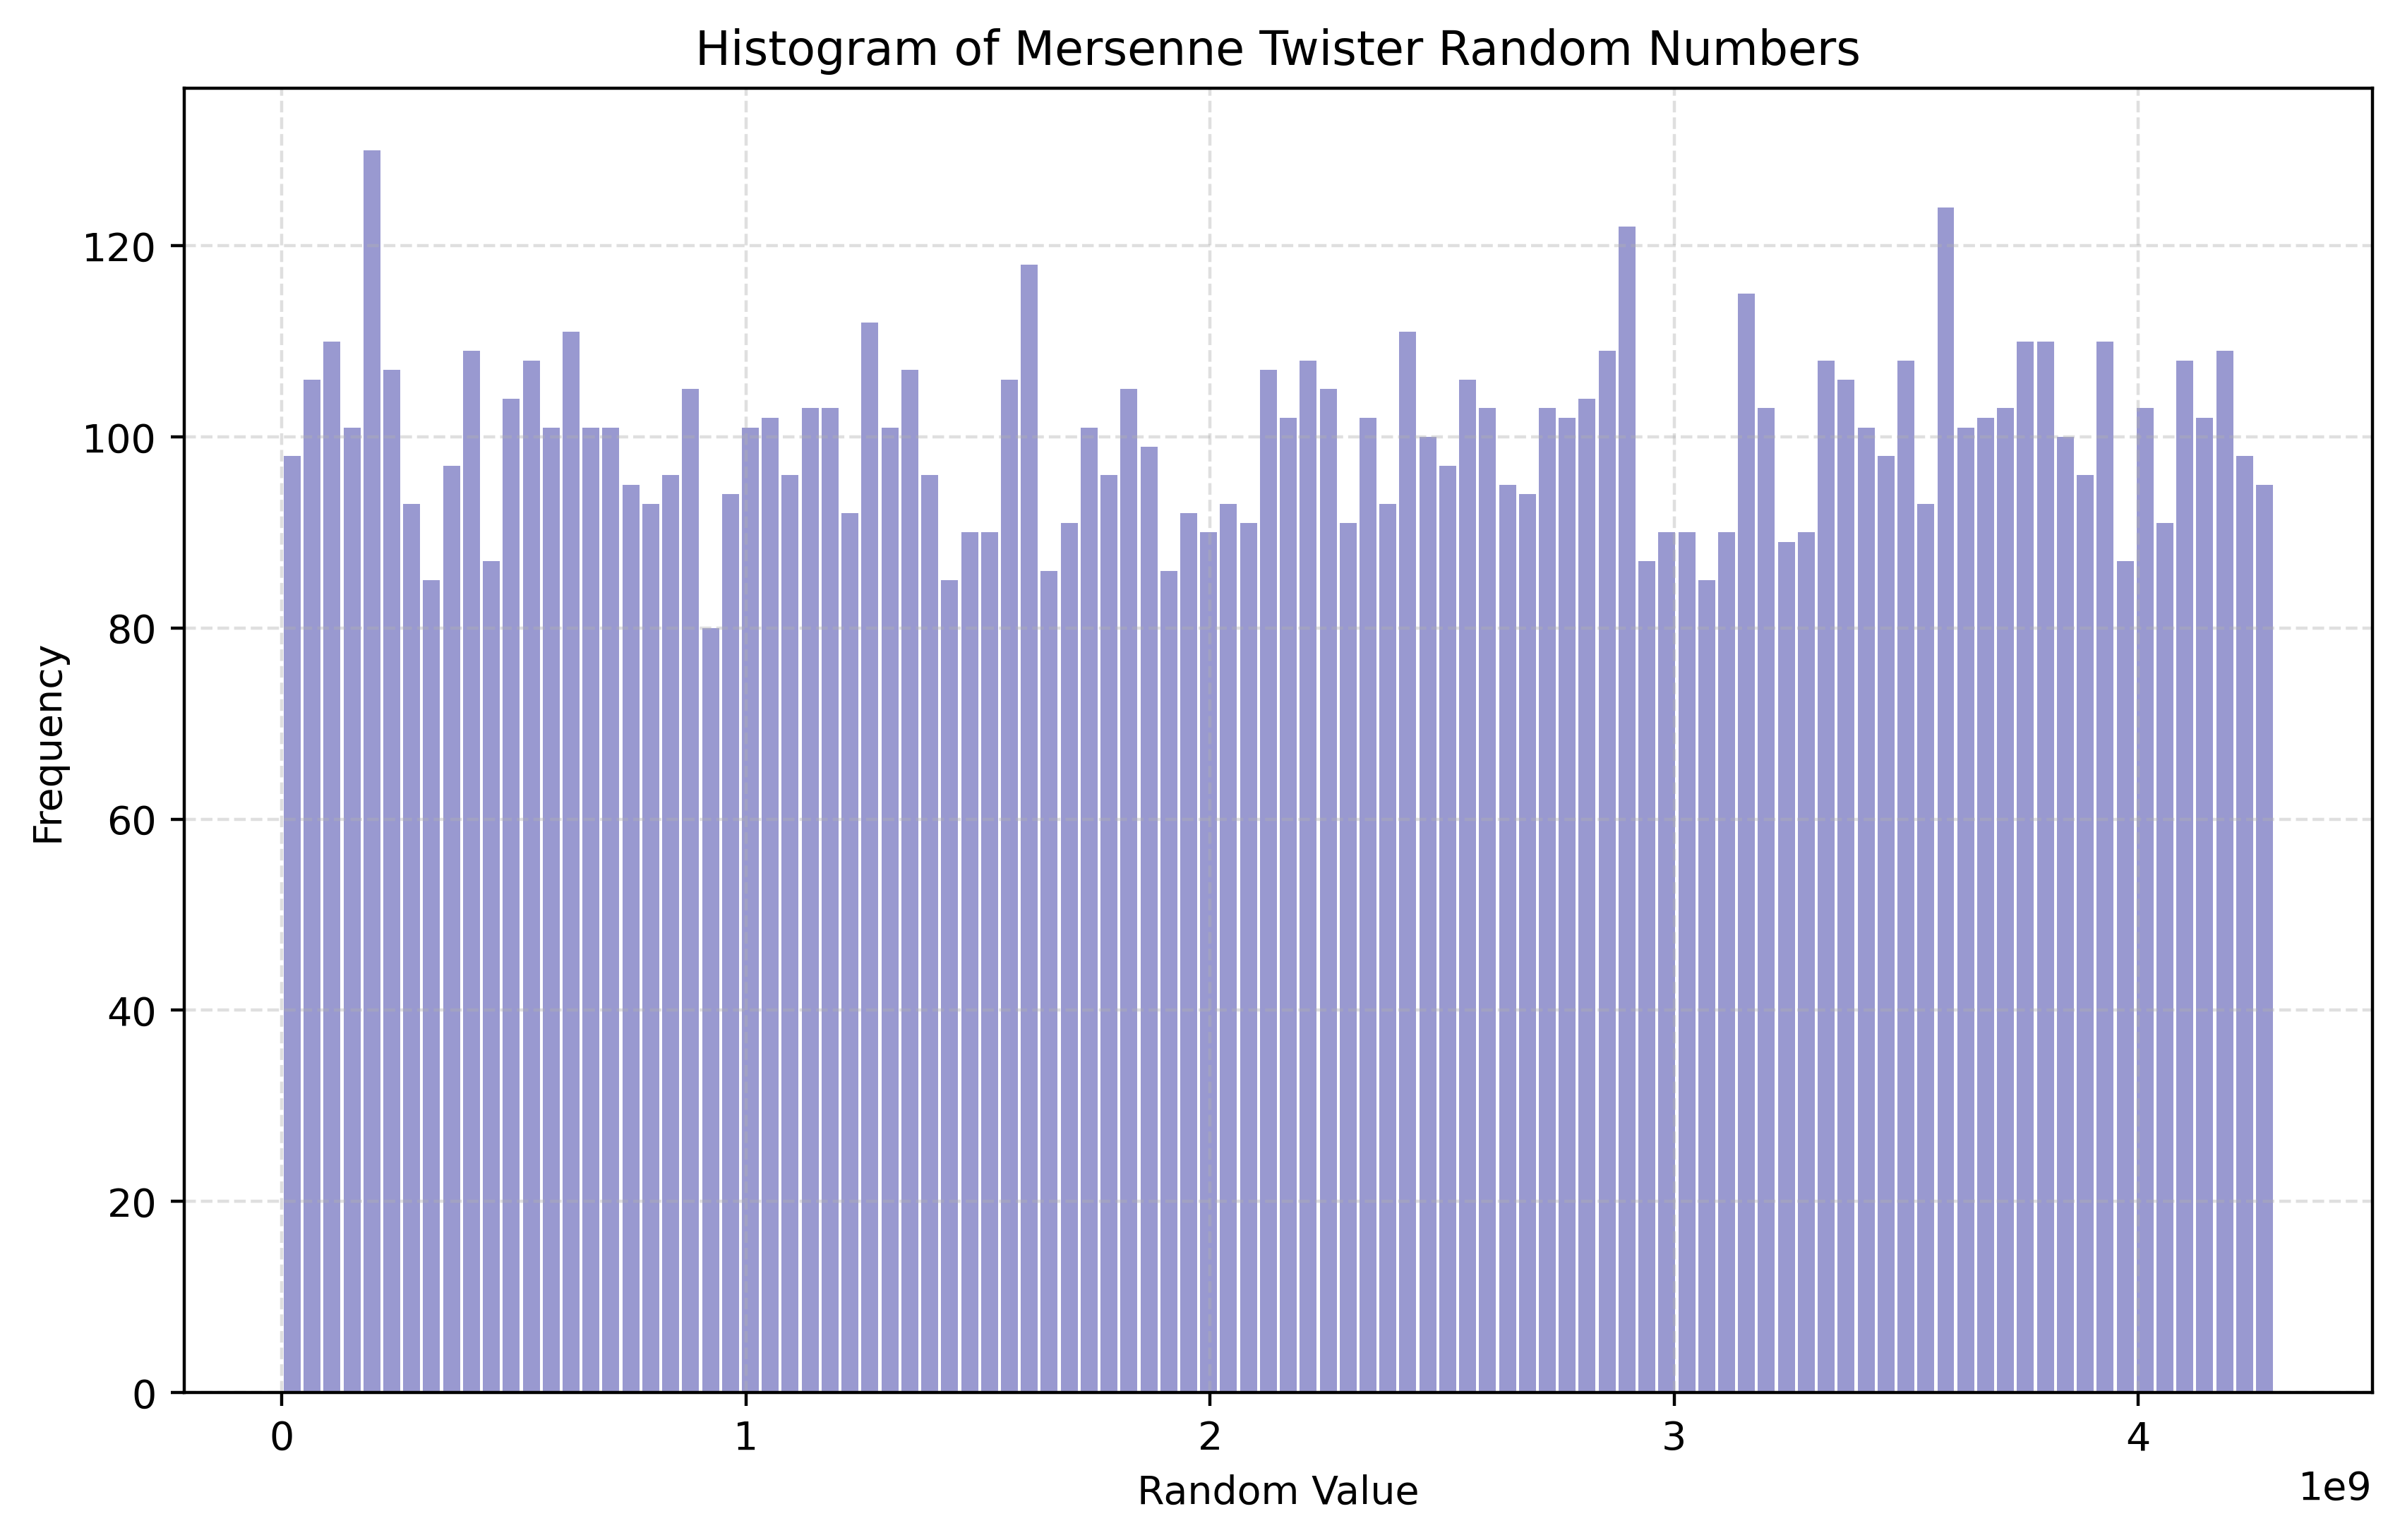

Autocorrelation of successive random numbers: -0.002872


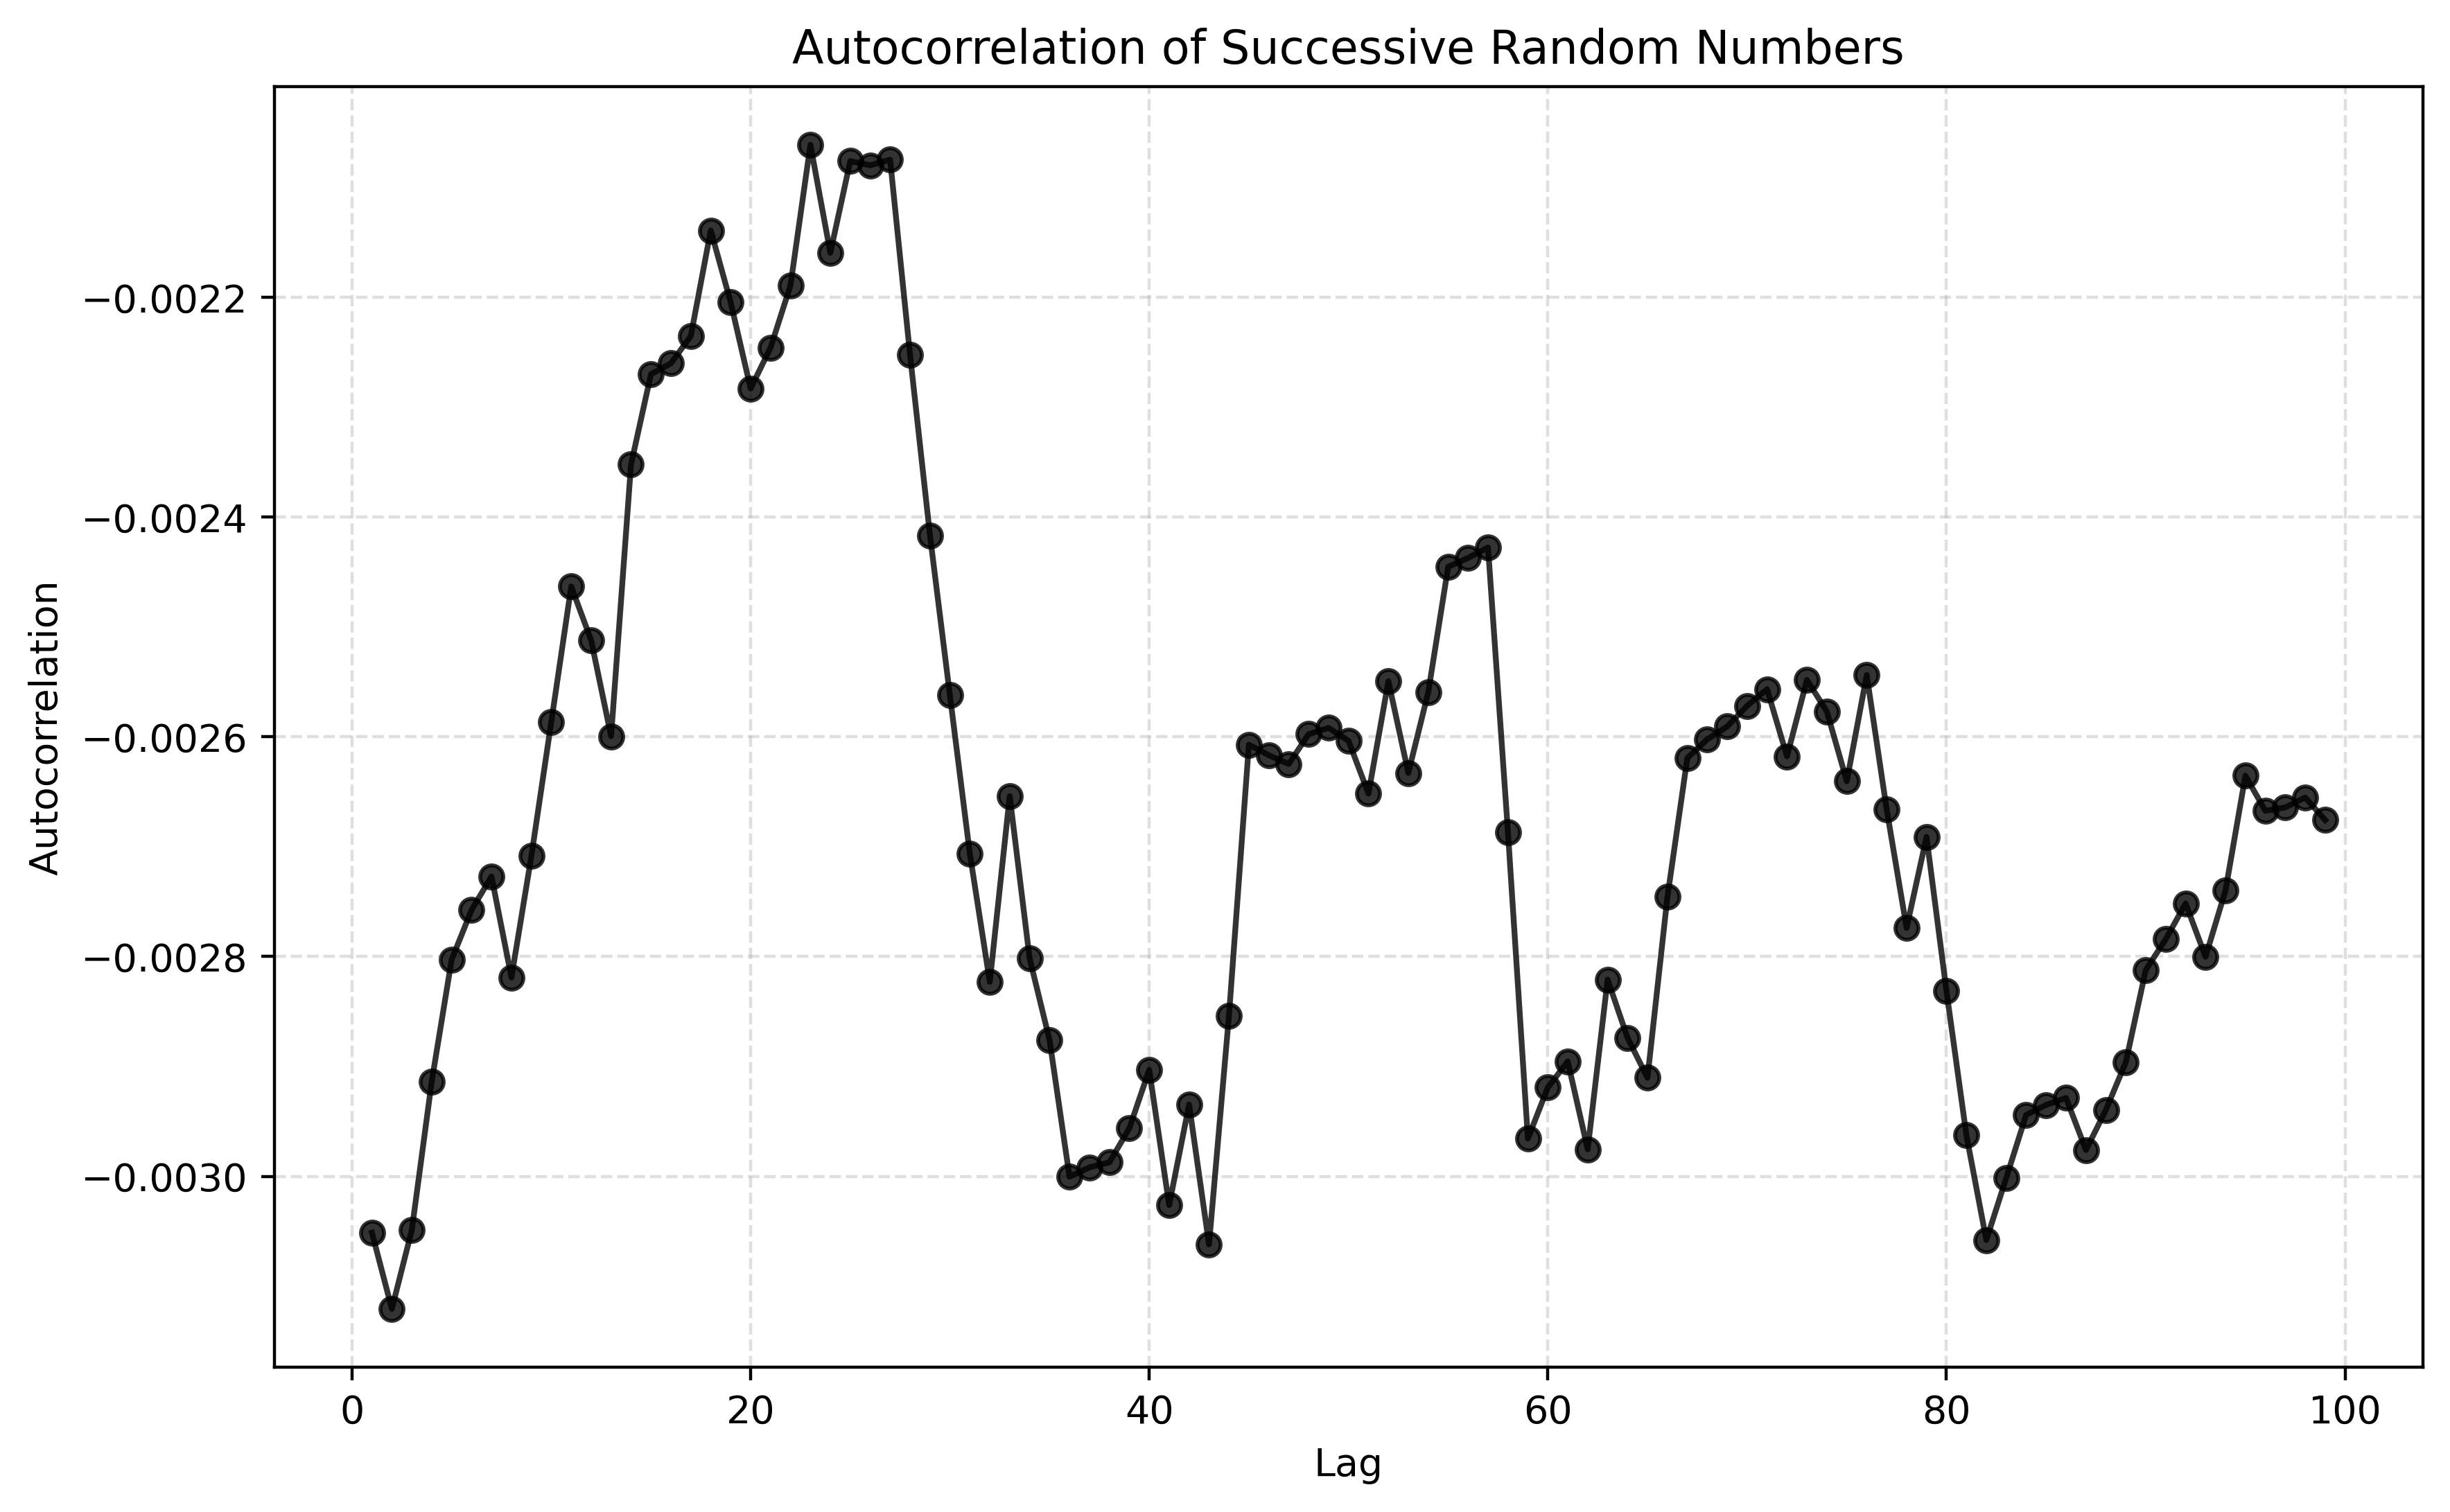

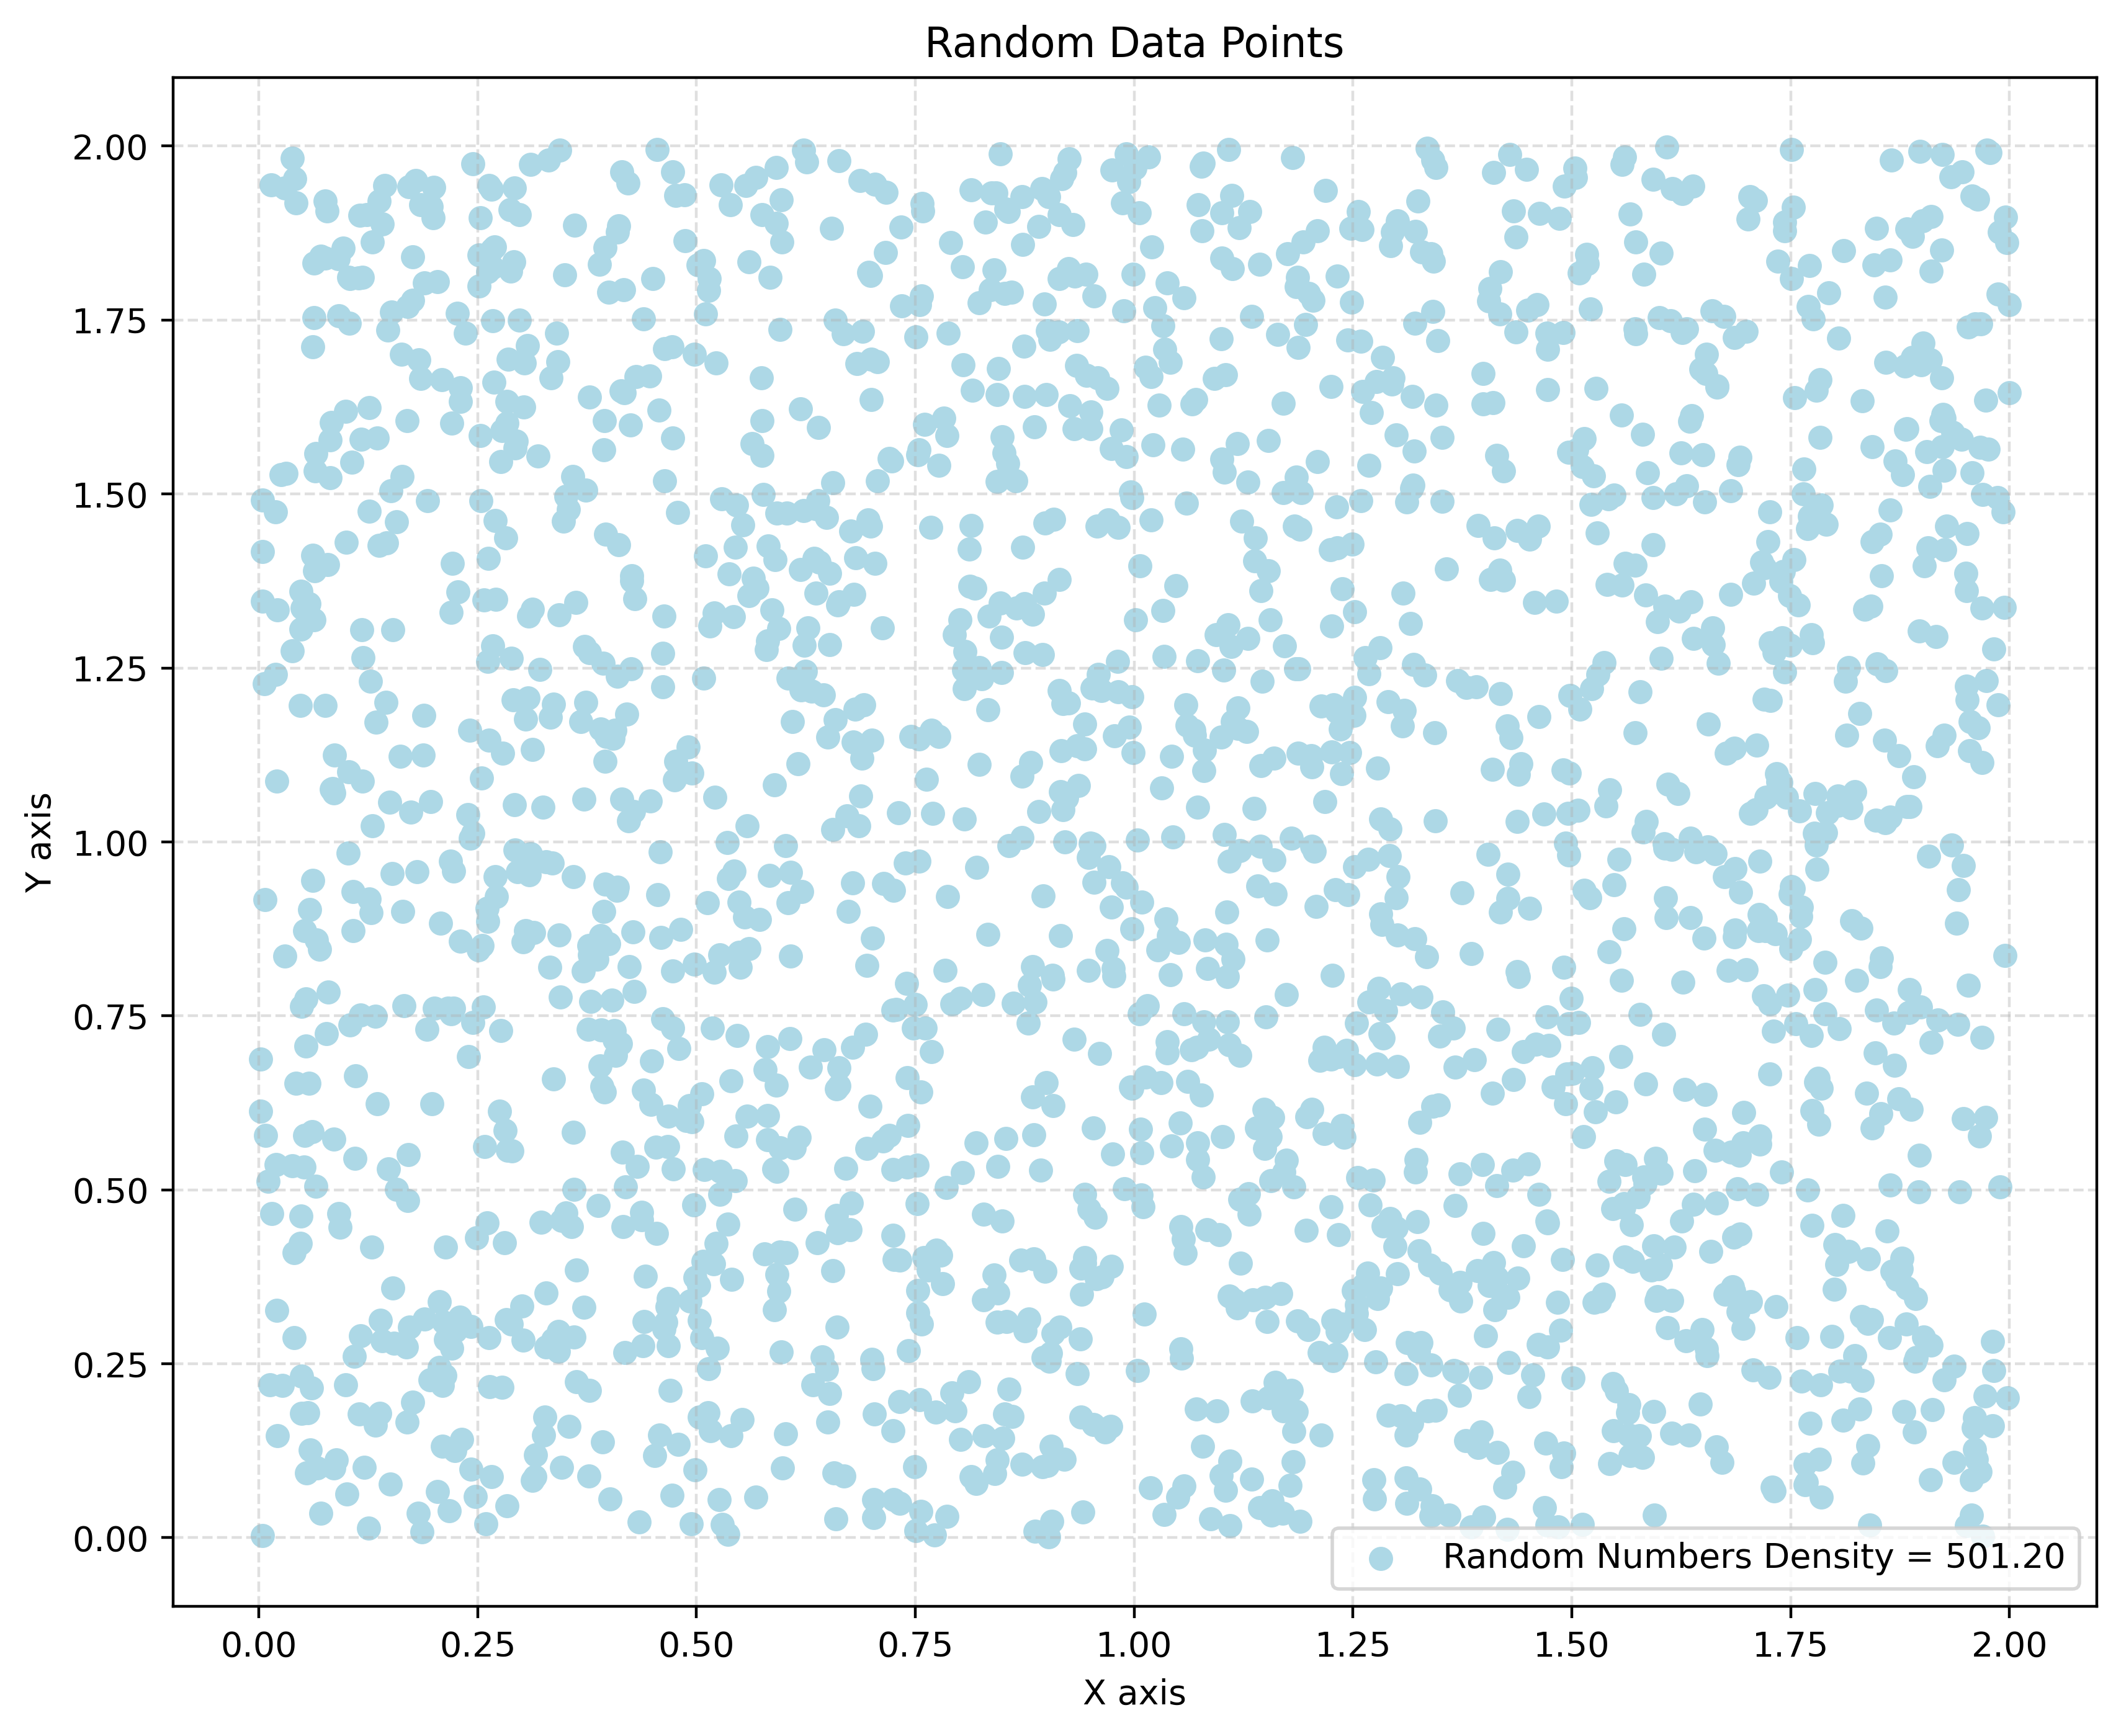

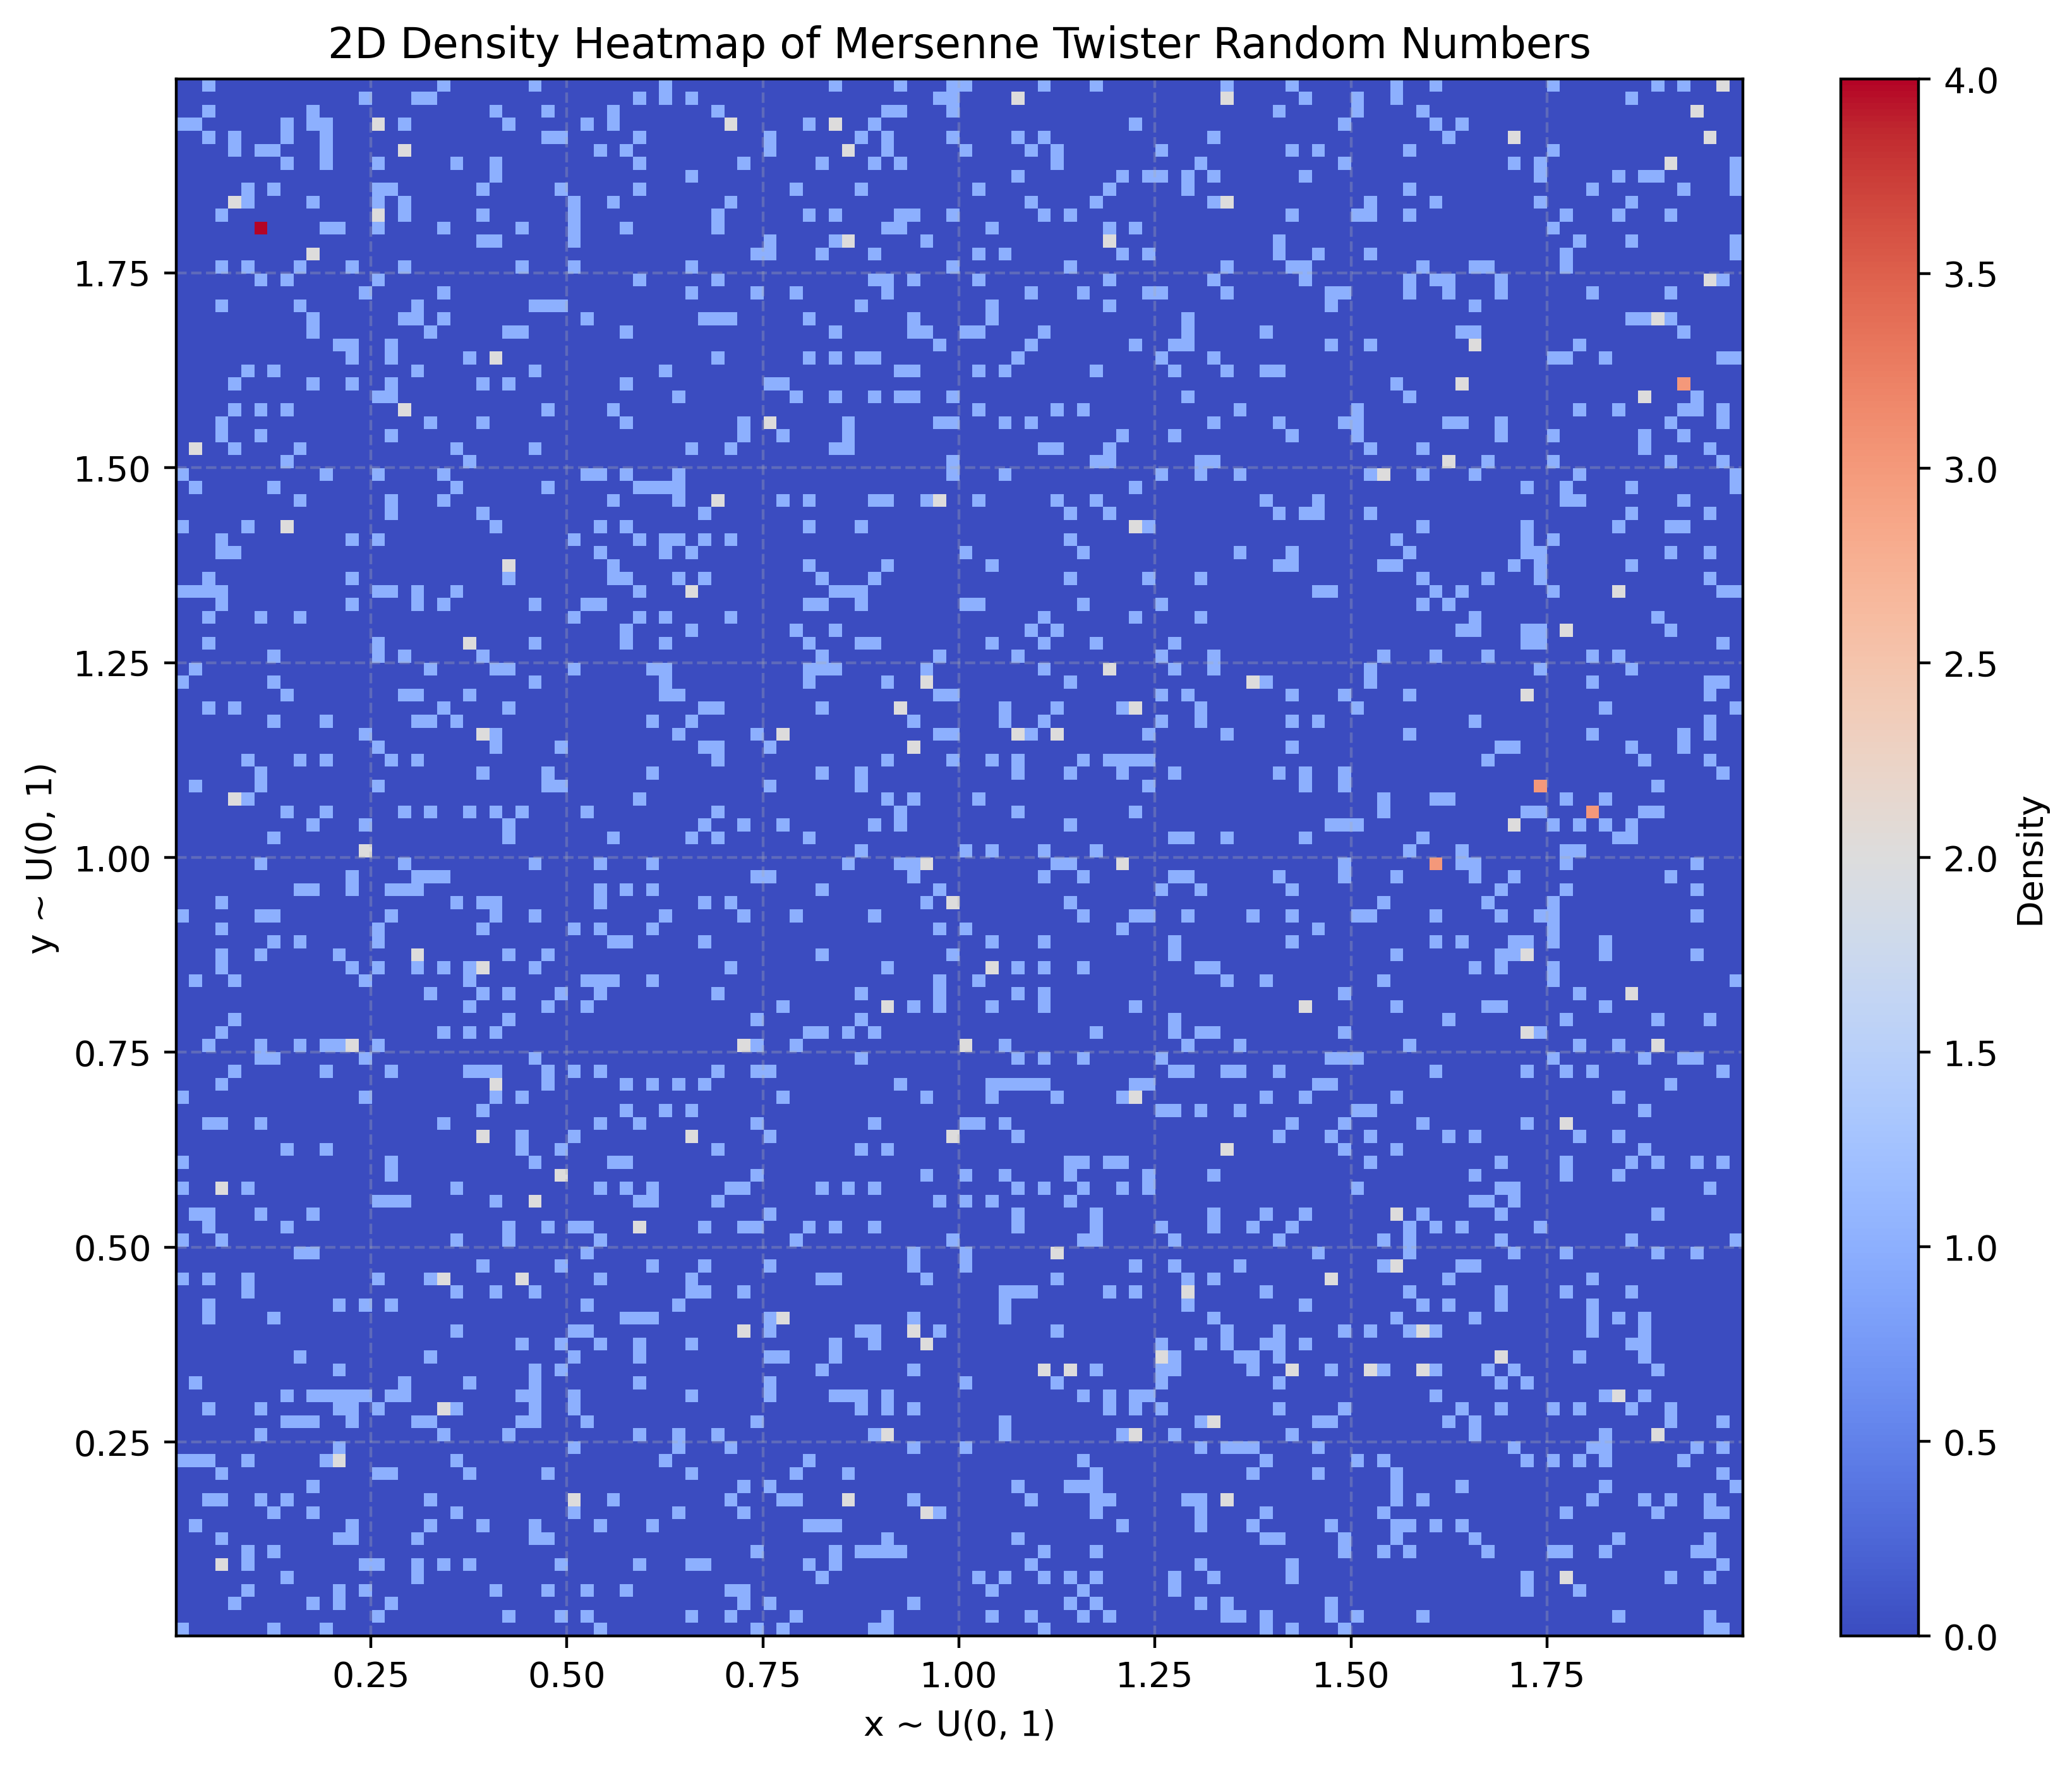

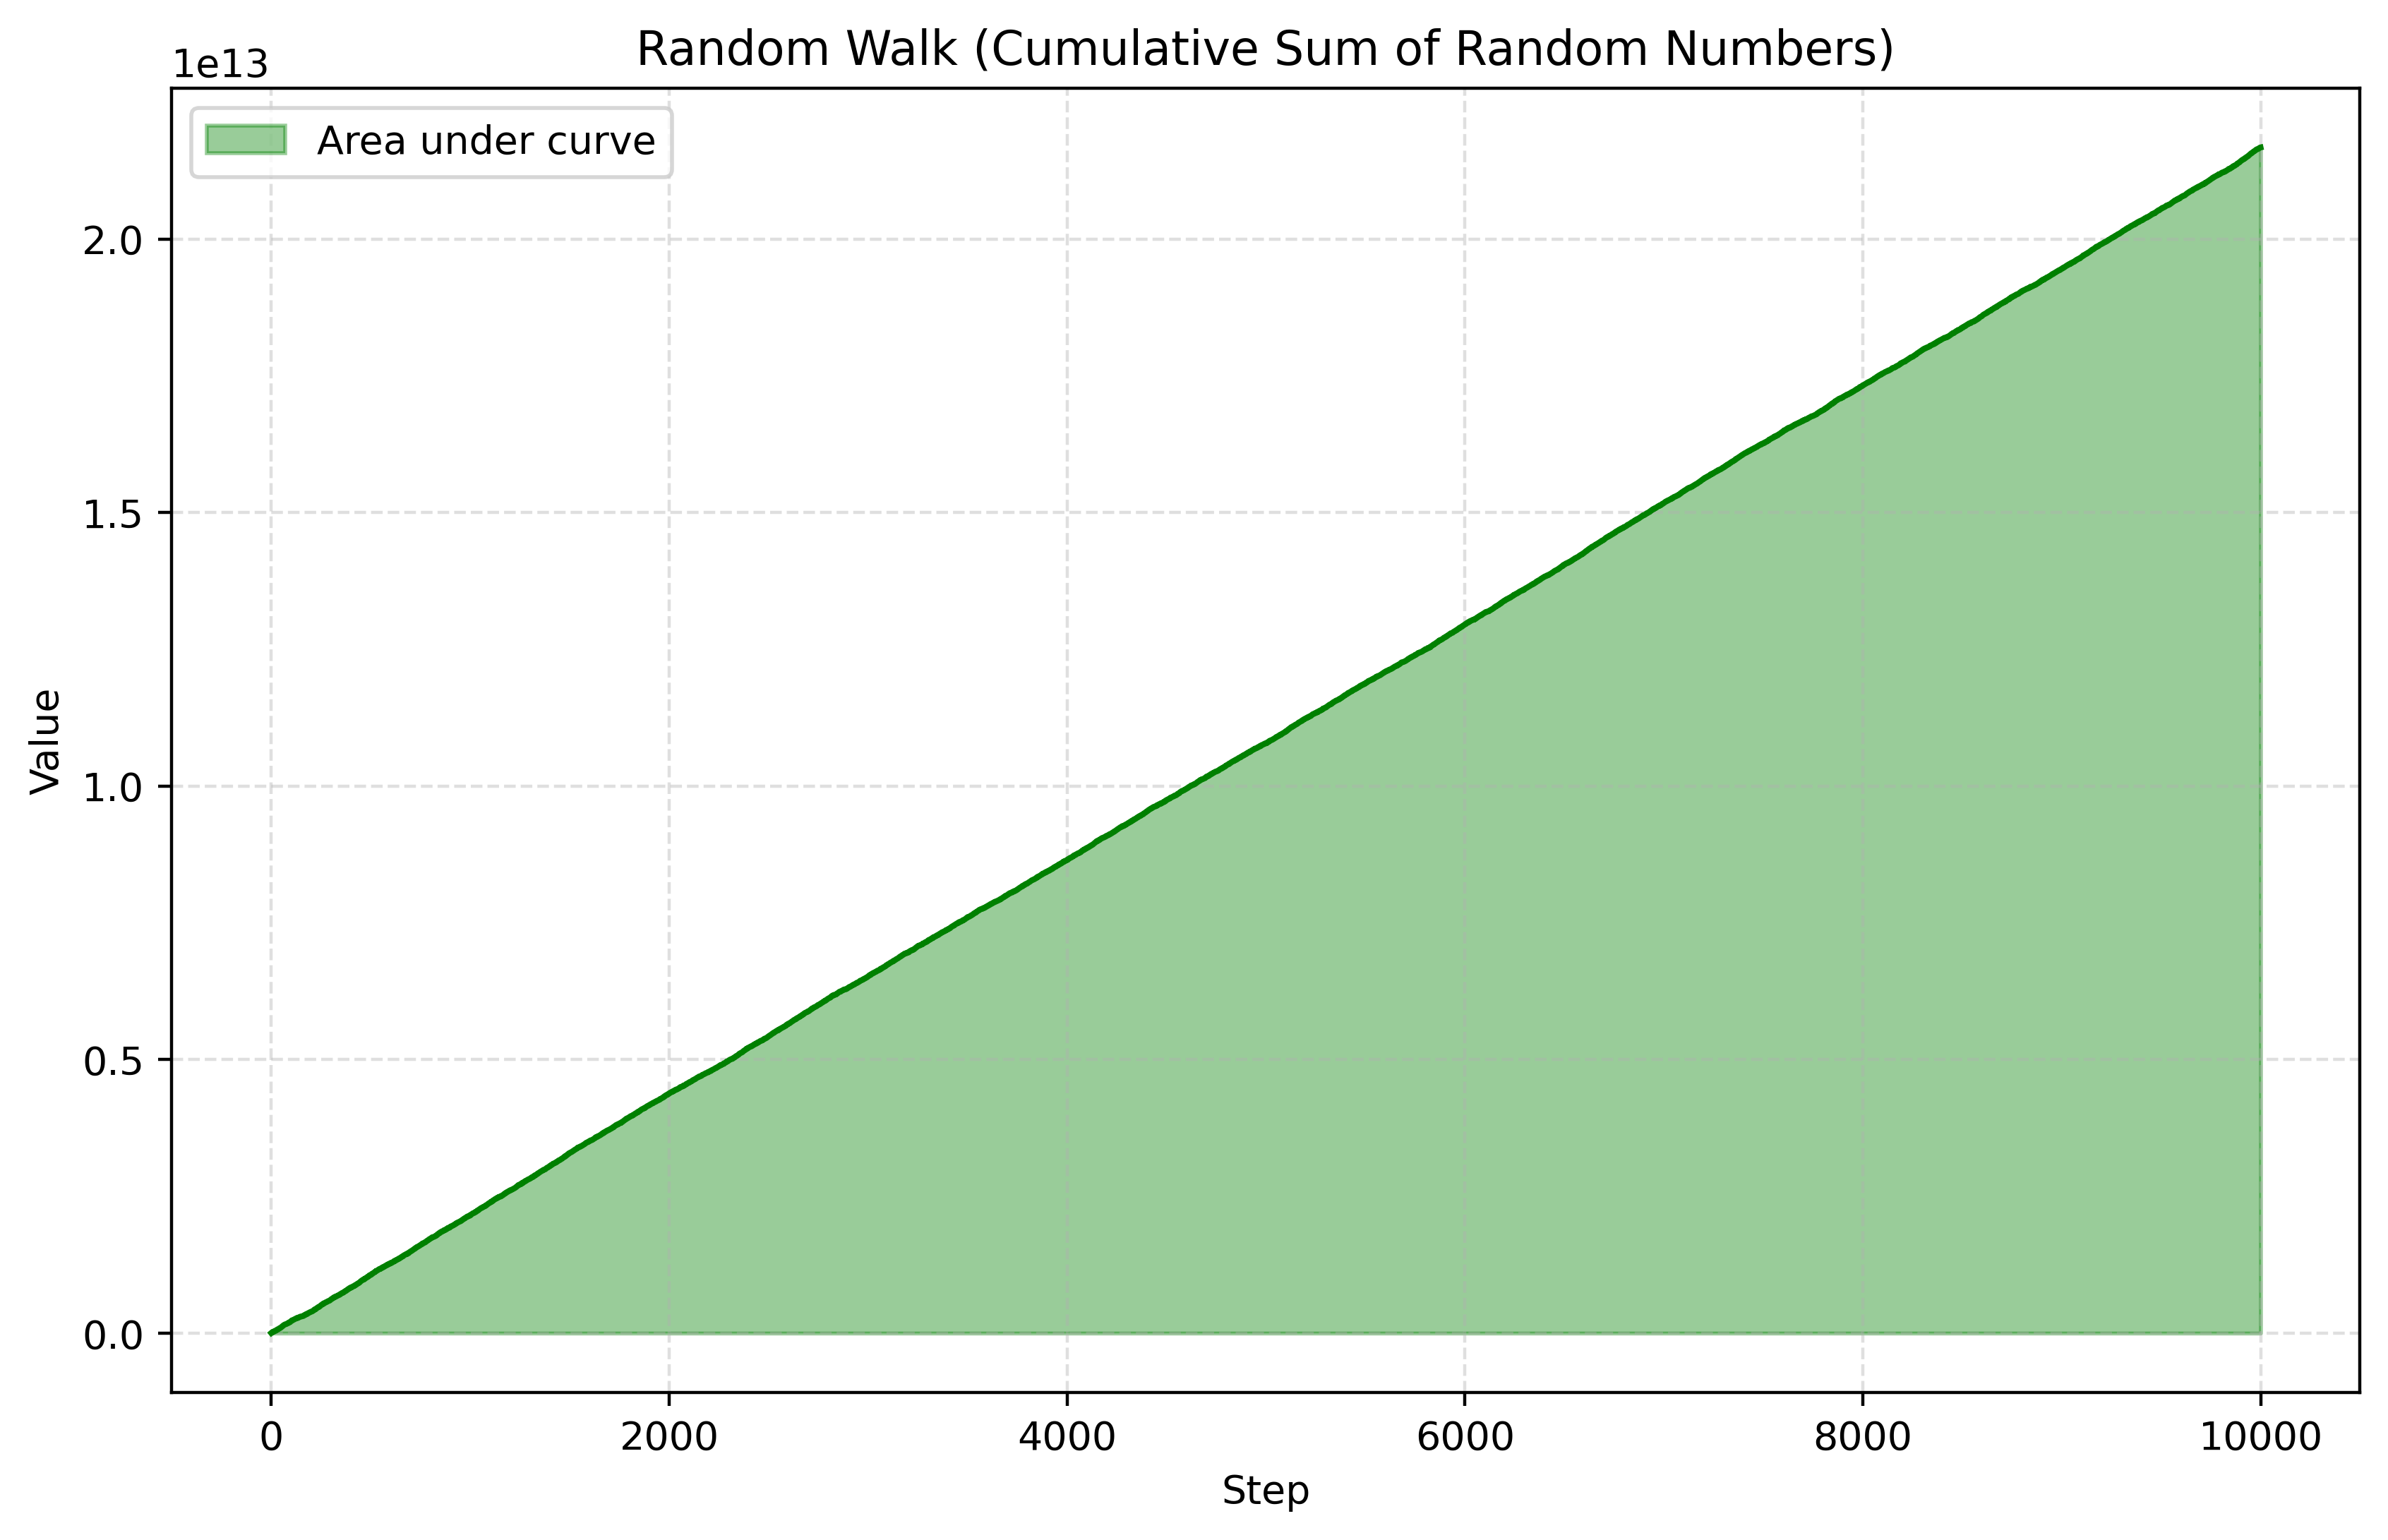

In [4]:
dpi = 400

plt.figure(figsize=(10, 6), dpi=dpi)
plt.hist(random_numbers, bins=100, color='darkblue', alpha=0.4, rwidth=0.85)
plt.title('Histogram of Mersenne Twister Random Numbers')
plt.xlabel('Random Value')
plt.ylabel('Frequency')
plt.grid(linestyle="--", alpha=0.4)
plt.show()

def autocorr(x):
    result = np.corrcoef(x[:-1], x[1:])[0, 1]
    return result

autocorr_value = autocorr(random_numbers)
print(f'Autocorrelation of successive random numbers: {autocorr_value:.6f}')

lags = np.arange(1, 100)
autocorr_values = [autocorr(random_numbers[i:]) for i in range(1, 100)]

plt.figure(figsize=(10, 6), dpi=dpi)
plt.plot(lags, autocorr_values, marker='o', linestyle='-', color='black', alpha=0.8)
plt.title('Autocorrelation of Successive Random Numbers')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(linestyle="--", alpha=0.4)
plt.show()

x = [random()/lower_mask for i in range(2000)]
y = [random()/lower_mask for i in range(2000)]

plt.figure(figsize=(10, 8), dpi=dpi)
plt.scatter(x, y, c="lightblue", label=f"Random Numbers Density = {len(x) / ((max(x) - min(x)) * (max(y) - min(y))):.2f}")
plt.title("Random Data Points")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()

plt.figure(figsize=(10, 8), dpi=dpi)
plt.hist2d(x, y, bins=120, cmap='coolwarm', density=False)
plt.colorbar(label='Density')
plt.title('2D Density Heatmap of Mersenne Twister Random Numbers')
plt.xlabel('x ~ U(0, 1)')
plt.ylabel('y ~ U(0, 1)')
plt.grid(linestyle="--", alpha=0.3)
plt.show()

random_walk = np.cumsum([random() for _ in range(10000)])

plt.figure(figsize=(10, 6), dpi=dpi)
plt.plot(random_walk, color='green')
plt.fill_between(range(len(random_walk)), random_walk, color='green', alpha=0.4, label='Area under curve')
plt.title('Random Walk (Cumulative Sum of Random Numbers)')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()


### Plots for 3-Dimensional Random Numbers

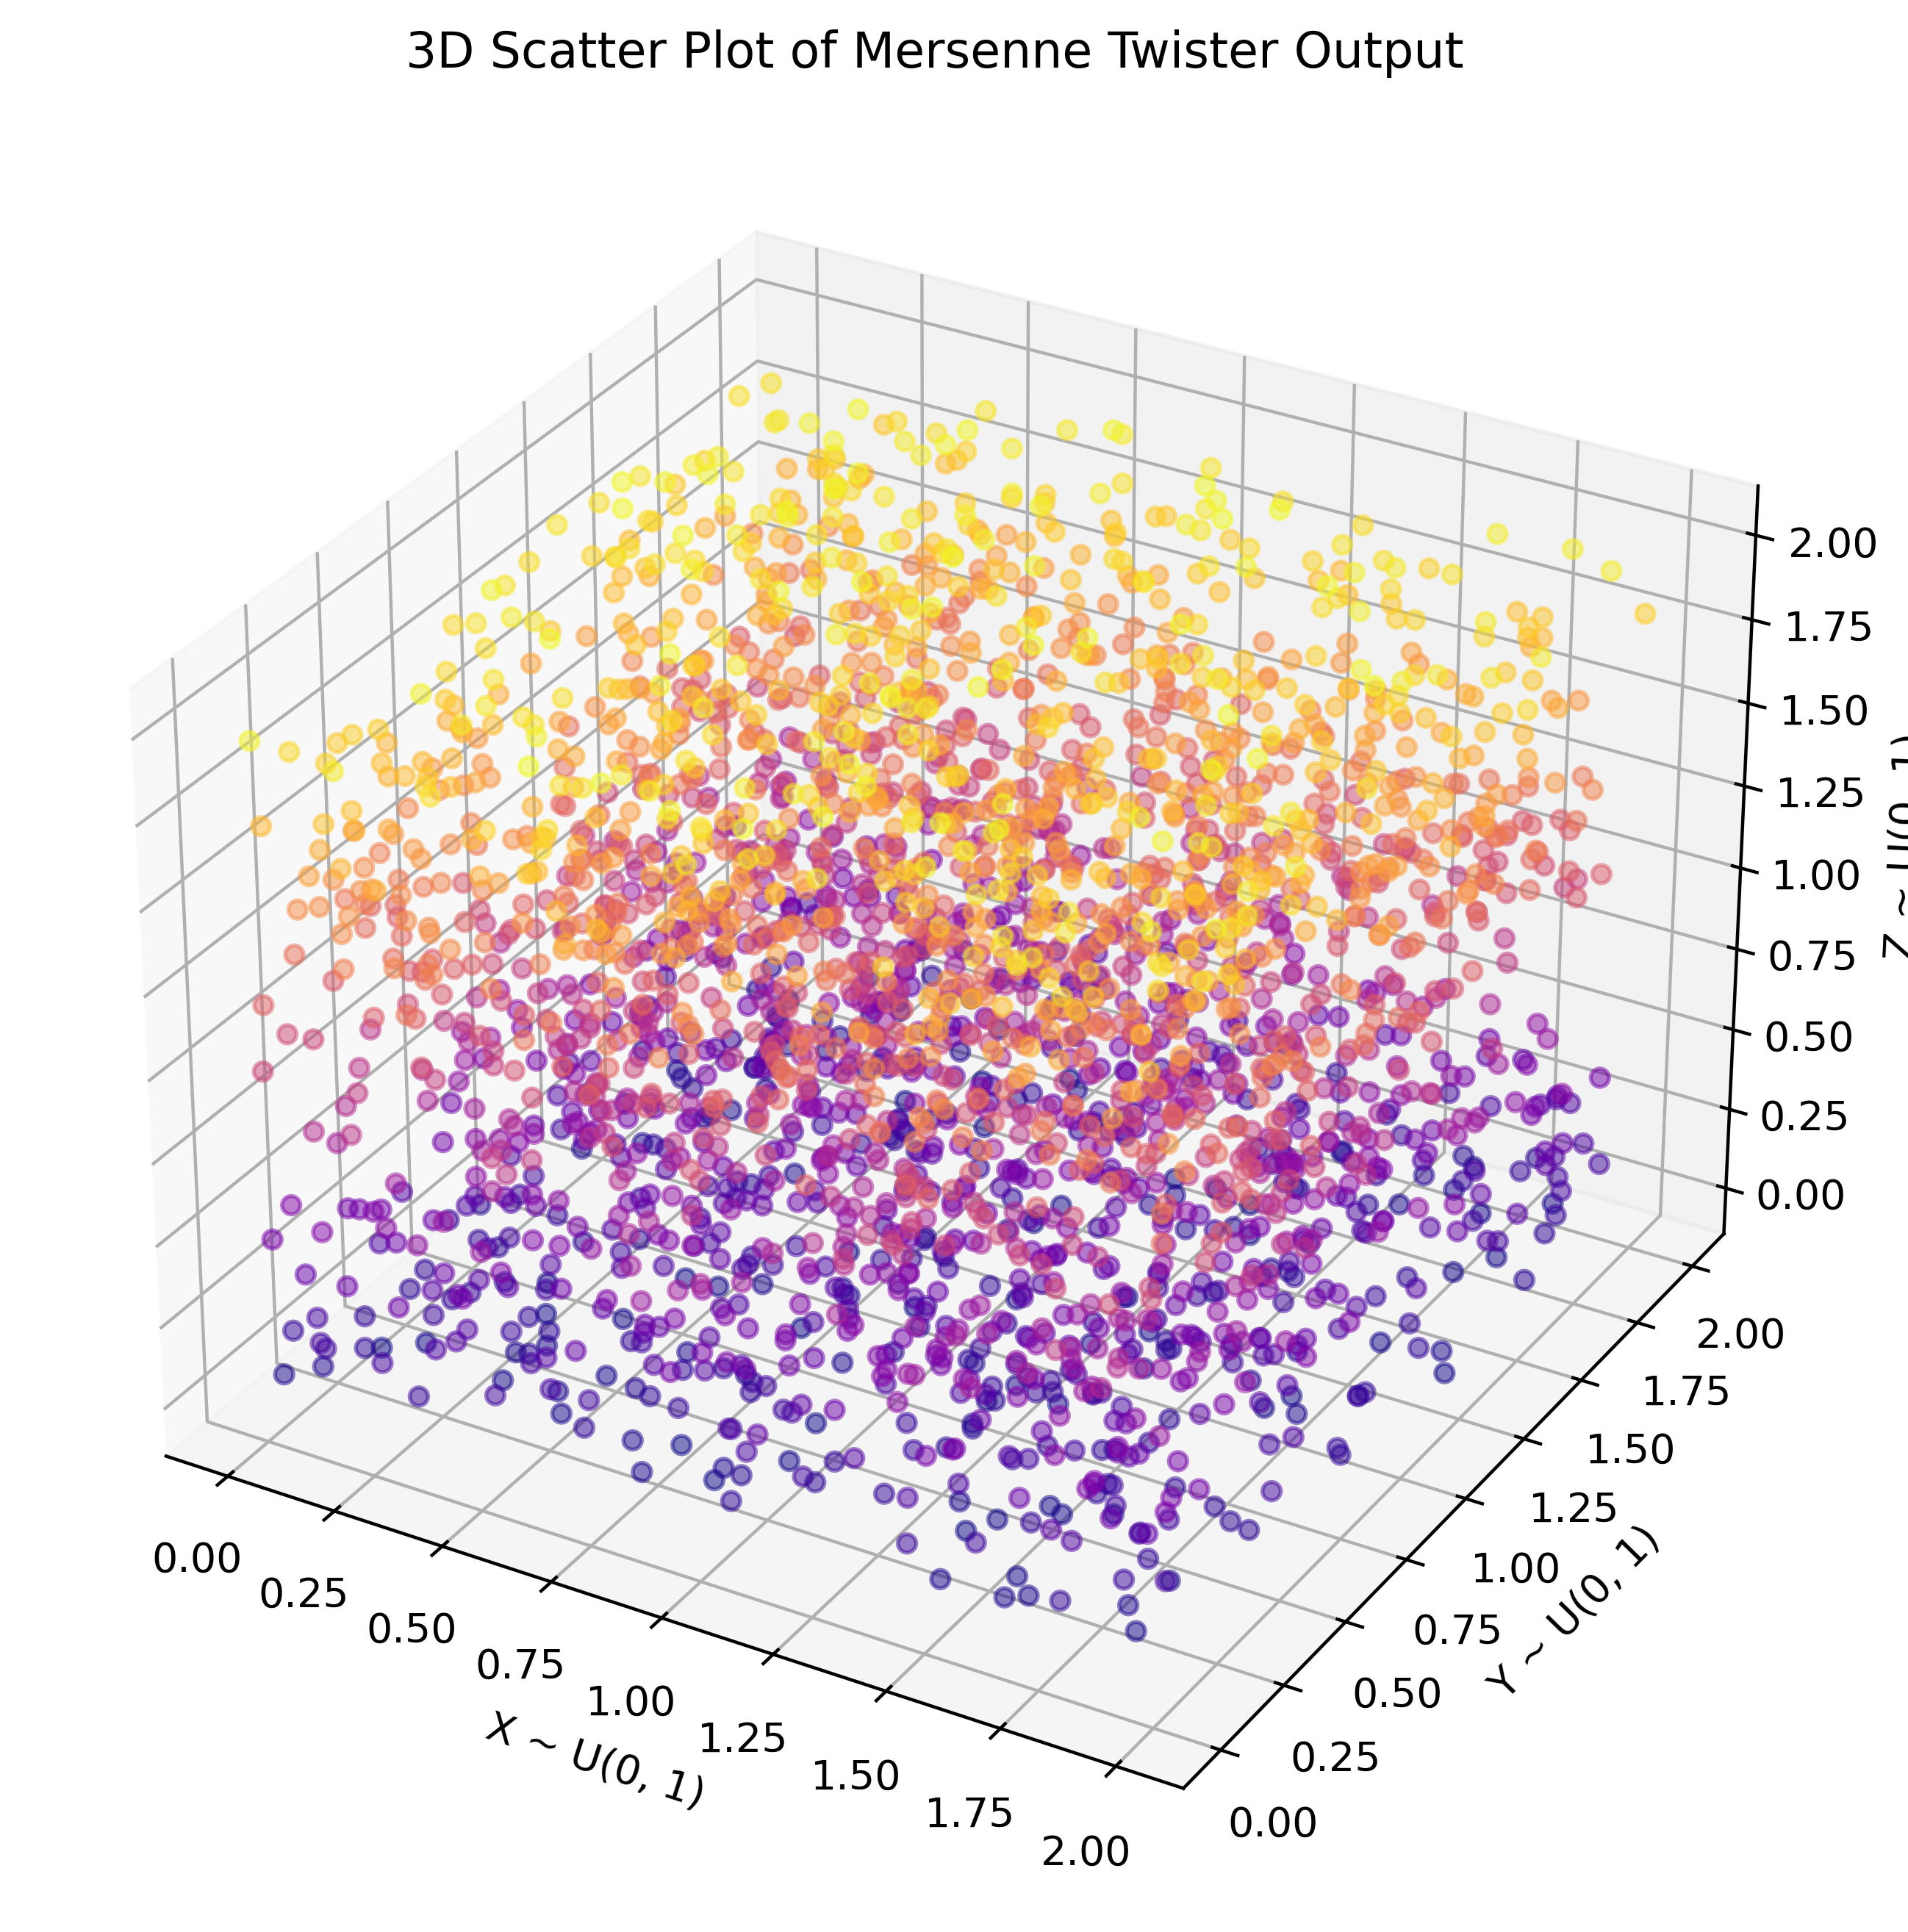

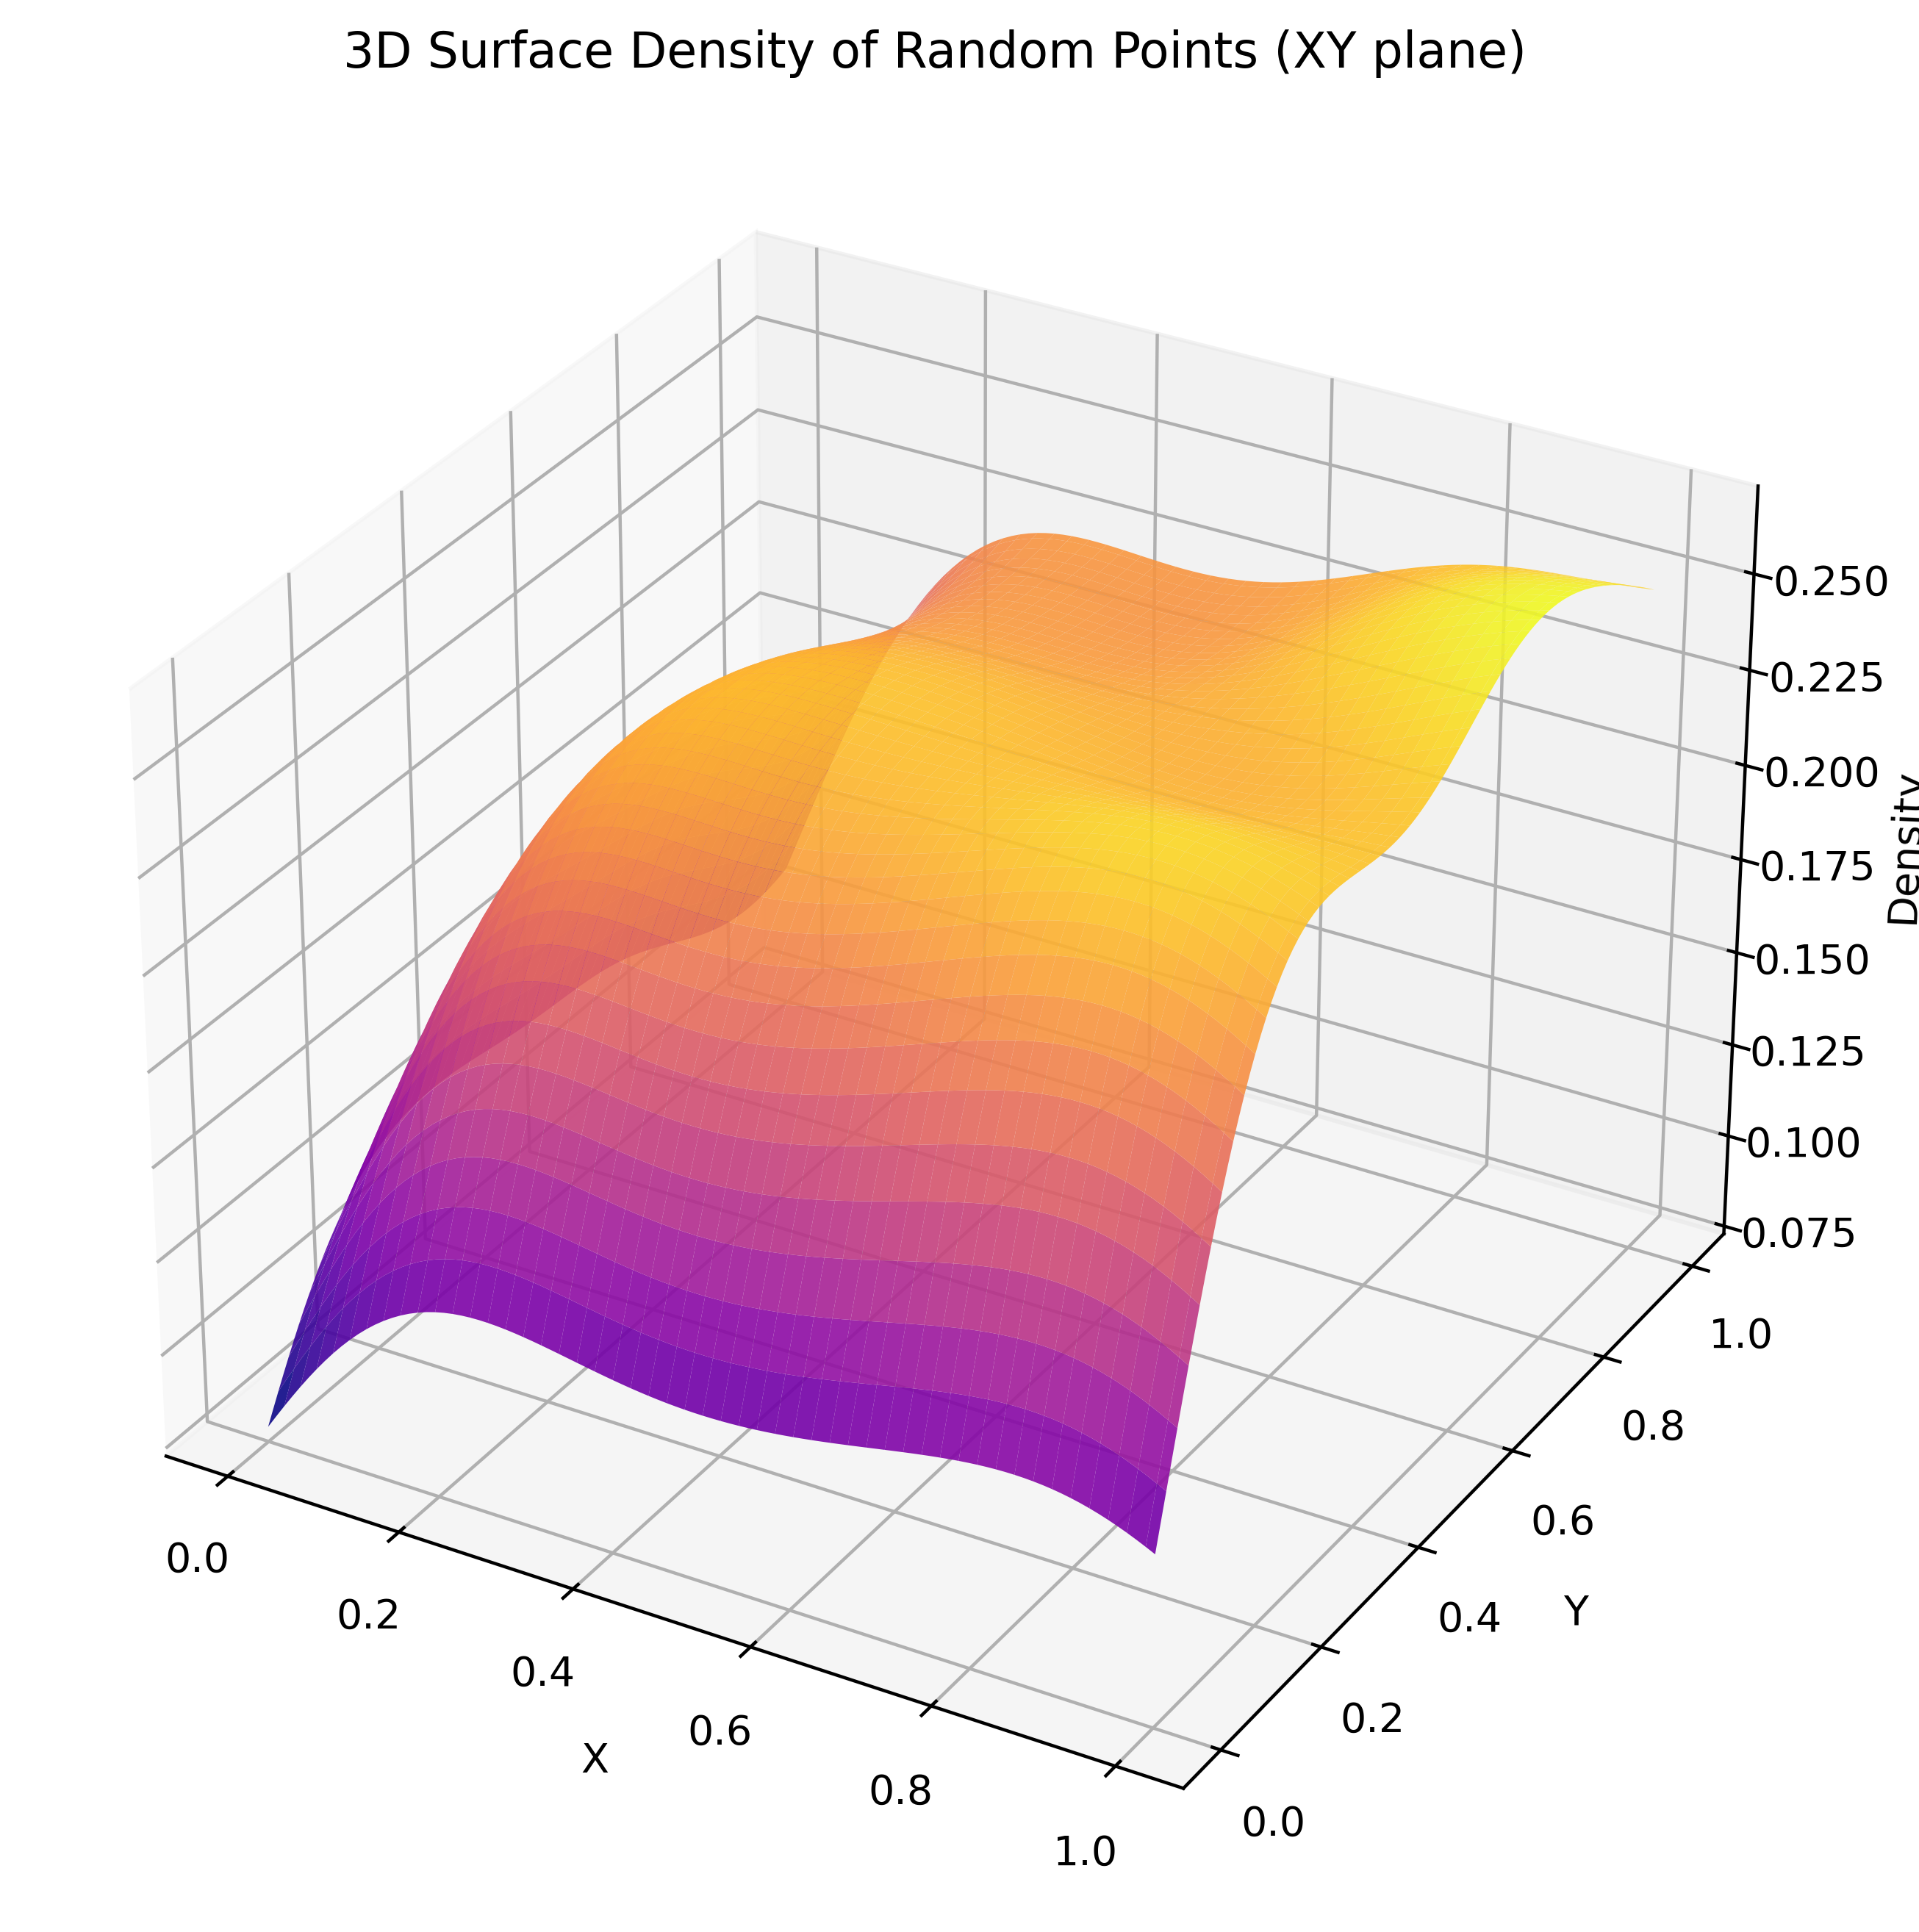

In [ ]:
num_points = 3000
x = [random() / lower_mask for _ in range(num_points)]
y = [random() / lower_mask for _ in range(num_points)]
z = [random() / lower_mask for _ in range(num_points)]

fig = plt.figure(figsize=(10, 8), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='plasma', marker='o', alpha=0.5)
ax.set_title('3D Scatter Plot of Mersenne Twister Output')
ax.set_xlabel('X ~ U(0, 2)')
ax.set_ylabel('Y ~ U(0, 2)')
ax.set_zlabel('Z ~ U(0, 2)')
plt.show()

x_vals = np.array(x)
y_vals = np.array(y)
k = stats.gaussian_kde([x_vals, y_vals])
xi, yi = np.mgrid[0:1:100j, 0:1:100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

fig = plt.figure(figsize=(10, 8), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi.reshape(xi.shape), cmap='plasma', edgecolor='none', alpha=0.9)
ax.set_title('3D Surface Density of Random Points (XY plane)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
plt.show()
